# Genome Analysis with `GenomeVisualizer`

This notebook demonstrates how to use the `GenomeVisualizer` toolbox to analyze genomic DNA sequences.  
We explore functions related to:
* basic k-mer analysis
* reverse complements
* replication origin detection

---

### Import

In [1]:
import GenomeVisualizer

### Load genome sequence from a file

In [2]:
genome = GenomeVisualizer.load_genome_from_txt("ecoli.txt")
print("Genome length:", len(genome))
print("First 100 bases:", genome[:100])

Genome length: 4641652
First 100 bases: AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAAT


### Reverse complement - primer design use case

Understanding the reverse complement of a DNA sequence is essential in molecular biology, especially in primer design.  
When designing primers for PCR amplification or sequencing, the primer must bind to the complementary strand of the DNA in the correct orientation.

The reverse complement gives you exactly what the primer will hybridize to — it reverses the sequence and swaps each base for its Watson–Crick pair:

- A ↔ T  
- C ↔ G

This ensures that your primer will bind to the correct location on the target strand in the right direction.

In [3]:
sequence = "AGCTTAGGCTA"
rc = GenomeVisualizer.ReverseComplement(sequence)
print("Sequence:", sequence)
print("Reverse Complement (reverse primer):", rc)

Sequence: AGCTTAGGCTA
Reverse Complement (reverse primer): TAGCCTAAGCT


### Basic k-mer analysis

In genomic analysis, a **k-mer** is a substring of length **k** extracted from a DNA sequence.  
Studying the frequency of k-mers in a genome is a foundational method to uncover biological signals such as:

- promoter regions,
- repetitive elements,
- binding sites,
- and horizontal gene transfer signals.

By counting the occurrences of each k-mer, we can identify which patterns are overrepresented — these are often biologically relevant.

#### 🔬 Most frequent 5-mers in the first 1000 bases:

In [4]:
subsequence = genome[:1000]
k = 5

freq_map = GenomeVisualizer.FrequencyMap(subsequence, k)
top_kmers = GenomeVisualizer.FrequentWords(subsequence, k)

sorted_freq_map = sorted(freq_map.items(), key=lambda item: item[1], reverse=True)

print(f"Top {k}-mers (most frequent):", top_kmers)
print(f"Top 15 most frequent {k}-mers:")
for kmer, count in sorted_freq_map[:15]:
    print(f"{kmer}: {count}")

Top 5-mers (most frequent): ['AAAAA']
Top 15 most frequent 5-mers:
AAAAA: 10
CATTA: 7
CACCA: 6
CCACC: 6
GAAAA: 6
TTTTT: 6
TTACC: 5
TGCCG: 5
ACCAC: 5
ACCAT: 5
GCTGA: 5
GGCAG: 5
CCGCC: 5
CGCCG: 5
TGCTG: 5


### Visualize base composition using a symbol array

In genomics, analyzing the base composition along the genome helps reveal nucleotide-rich regions.  
For instance, **C-rich or G-rich domains** may signal structural features, regulatory zones, or genome organization patterns.

#### 🔬 Frequency of 'C' nucleotides in the E. coli genome:

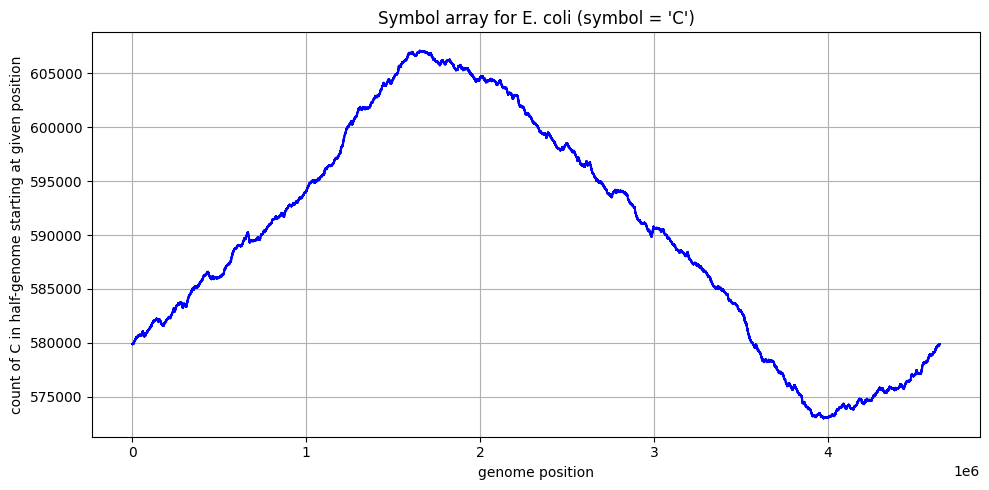

In [5]:
symbol_array = GenomeVisualizer.FasterSymbolArray(genome, "C")
GenomeVisualizer.plot_symbol_array(symbol_array, symbol="C", genome_label="E. coli")

### Detecting the replication origin using GC-skew analysis

The replication origin (ori) in prokaryotic genomes can be detected by analyzing nucleotide skews.
One widely used approach is the **GC-skew**, which measures the cumulative difference between G and C nucleotides across the genome:

The idea is that the skew increases in one half of the genome and decreases in the other.
Thus, the **minimum point of the skew curve indicates the likely location of the replication origin**.

We will use the `SkewArray()` function to compute the cumulative GC-skew and the `MinimumSkew()` function to identify the ori.

The lowest point(s) of the GC-skew curve represent the most probable locations of the origin of replication.
In *E. coli*, this typically falls around position ~4,000,000. You may also observe a local maximum at the replication terminus.

Minimum skew found at position(s): [3925597, 3925598, 3925599, 3925600]


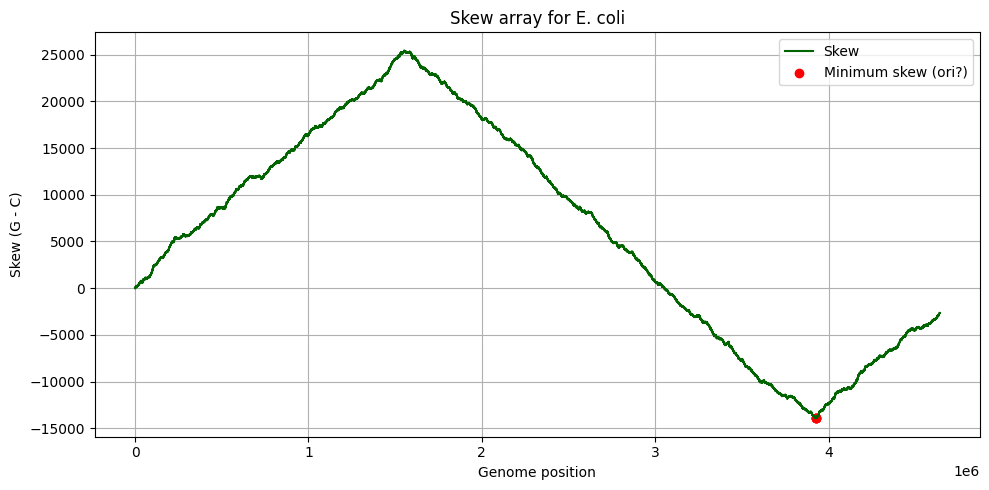

In [6]:
skew = GenomeVisualizer.SkewArray(genome)
ori_pos = GenomeVisualizer.MinimumSkew(genome)
print(f"Minimum skew found at position(s): {ori_pos}")
GenomeVisualizer.plot_skew_array_with_ori(skew, ori_pos, genome_label="E. coli")